In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
raid15 = pd.read_csv('Abyssal raid 15:02.csv')

raid16 = pd.read_csv('Abyssal raid 16:02.csv')


In [7]:
raid15.columns

Index(['userId', 'damage', 'enemy', 'timestamp', 'sessionId', 'death',
       'weaponName', 'weaponType'],
      dtype='object')

In [18]:

data_arr = [raid15, raid16]

Total Damage: 7461012.0
Unique Users: 43


/var/folders/lb/zdn8z8h52qj98k97p1vxq7jm0000gn/T/ipykernel_13831/2923876856.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_minute = data.resample('T', on='timestamp').sum()
/var/folders/lb/zdn8z8h52qj98k97p1vxq7jm0000gn/T/ipykernel_13831/2923876856.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  for timestamp, group in data.resample('T', on='timestamp'):
/var/folders/lb/zdn8z8h52qj98k97p1vxq7jm0000gn/T/ipykernel_13831/2923876856.py:30: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  'timestamp': data.resample('T', on='timestamp').max().index,


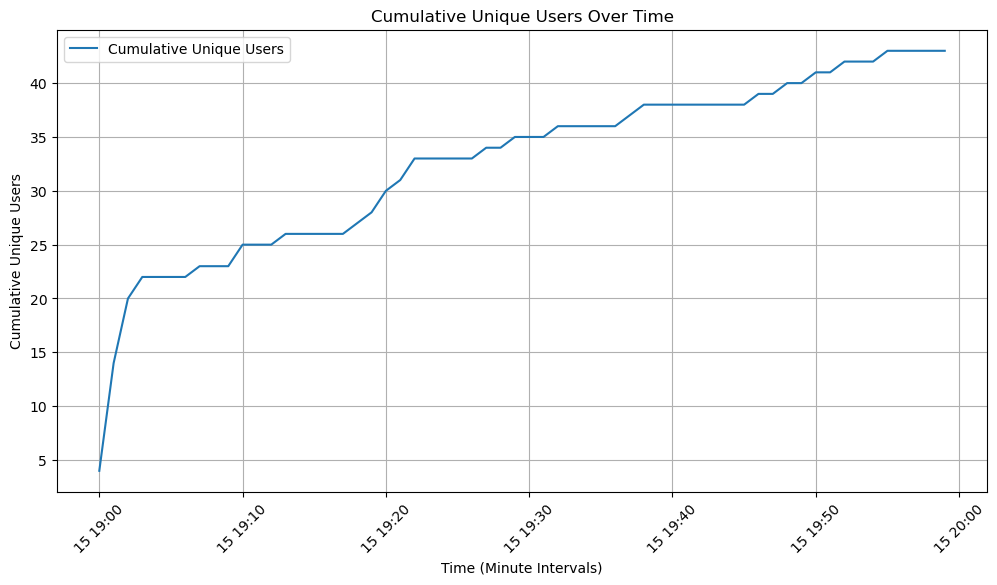

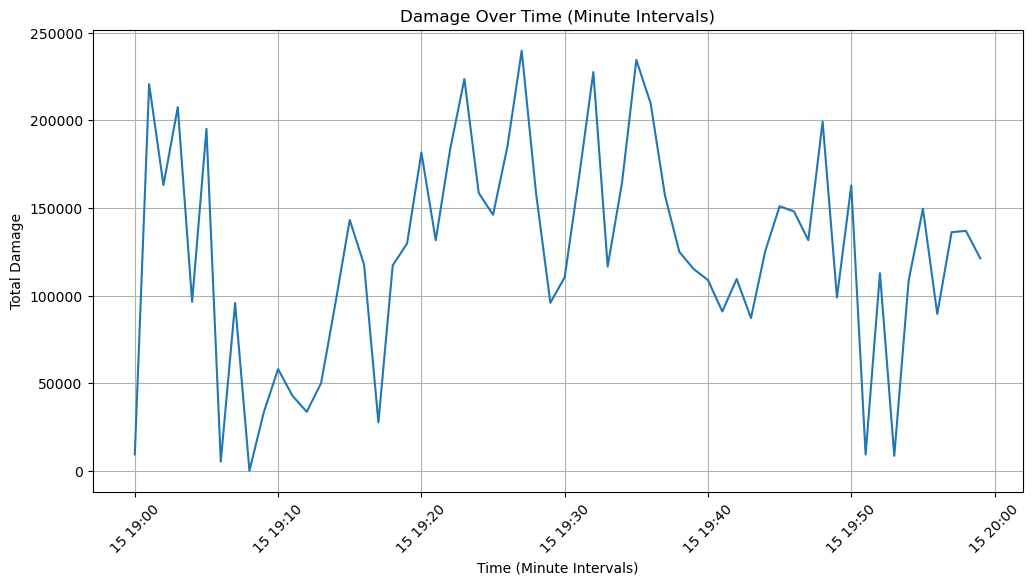

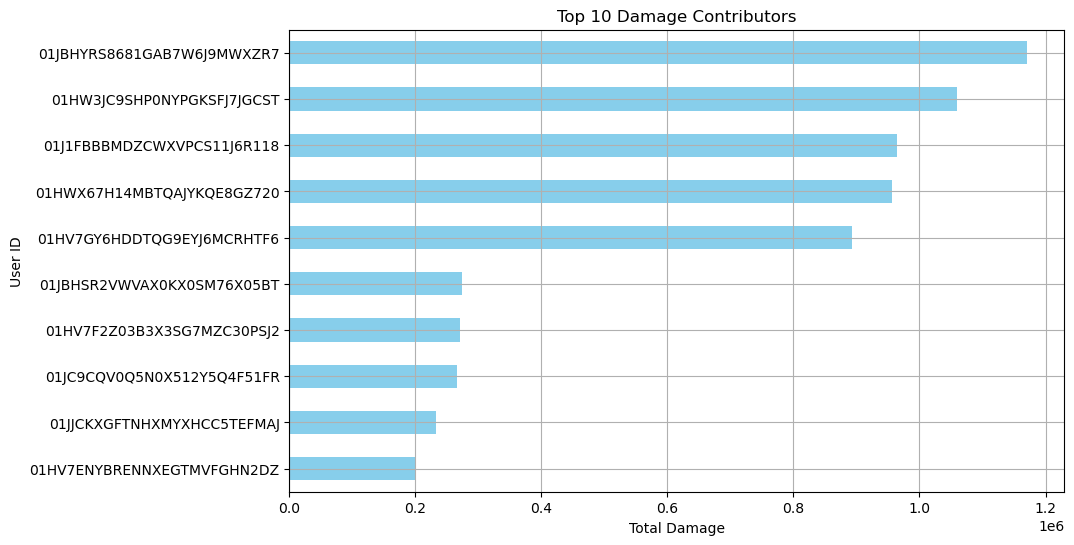

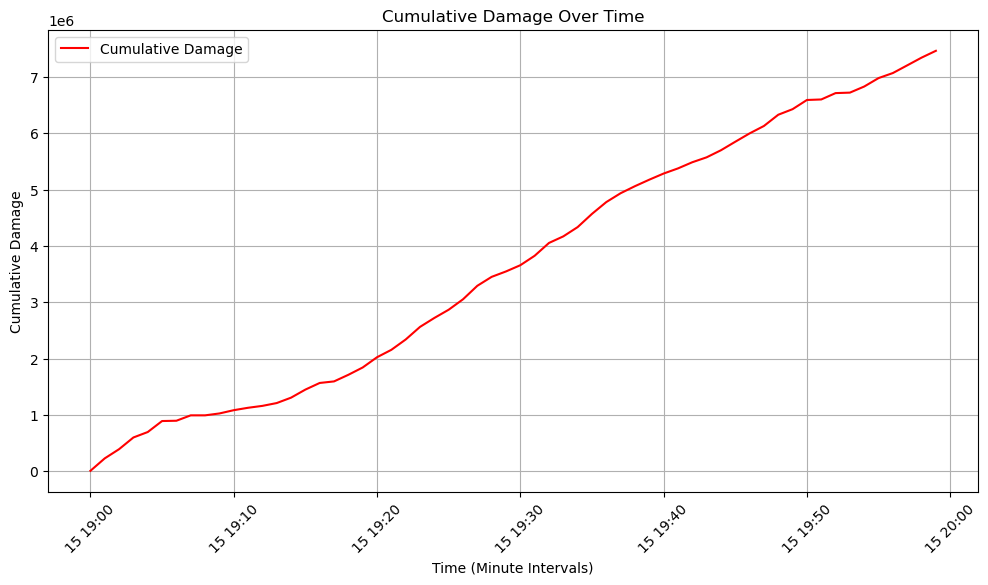

Total Damage: 8809814.0
Unique Users: 46


/var/folders/lb/zdn8z8h52qj98k97p1vxq7jm0000gn/T/ipykernel_13831/2923876856.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_minute = data.resample('T', on='timestamp').sum()
/var/folders/lb/zdn8z8h52qj98k97p1vxq7jm0000gn/T/ipykernel_13831/2923876856.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  for timestamp, group in data.resample('T', on='timestamp'):
/var/folders/lb/zdn8z8h52qj98k97p1vxq7jm0000gn/T/ipykernel_13831/2923876856.py:30: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  'timestamp': data.resample('T', on='timestamp').max().index,


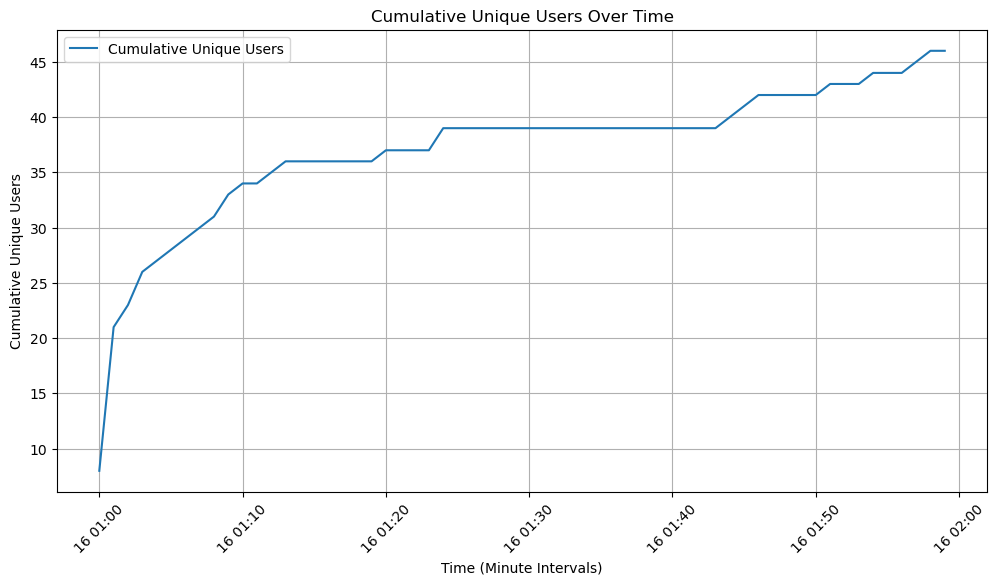

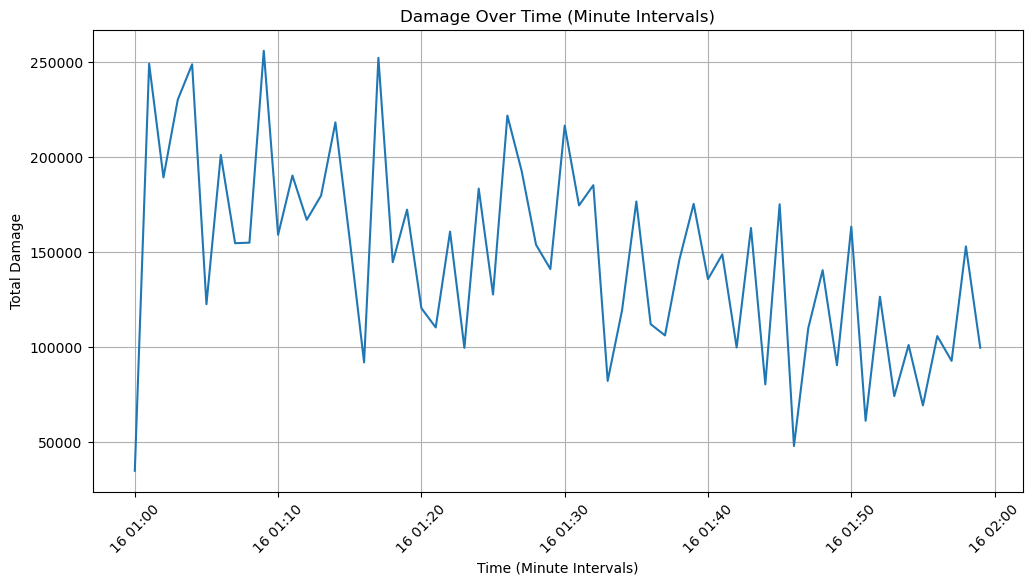

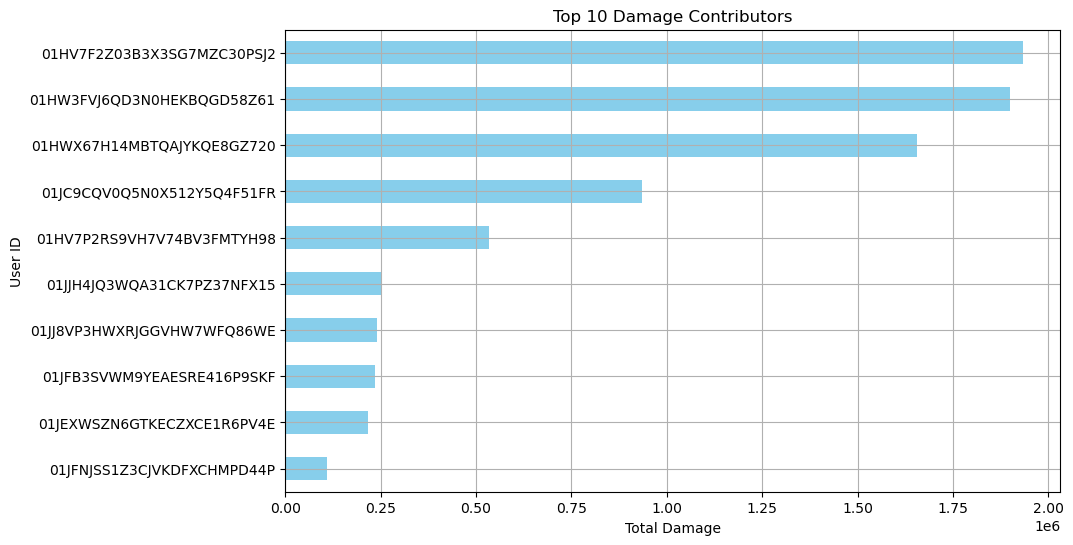

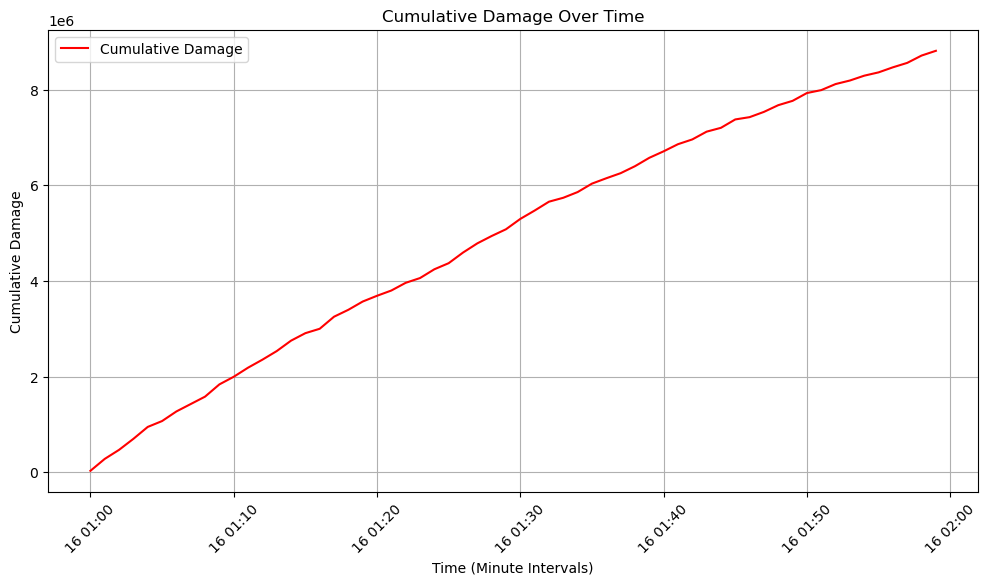

In [25]:
for data in data_arr:

    # Assuming data is your DataFrame with 'timestamp' and 'damage' columns
    data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamp is in datetime format

    # Resample by minute and sum the damage
    data_minute = data.resample('T', on='timestamp').sum()

  

    # Total damage
    total_damage = data['damage'].sum()
    print(f"Total Damage: {total_damage}")

    # Number of unique users
    unique_users = data['userId'].nunique()
    print(f"Unique Users: {unique_users}")

    data = data.sort_values(by='timestamp')

    # Resample the data into 1-minute intervals and track cumulative unique users
    cumulative_users = set()
    cumulative_counts = []
    for timestamp, group in data.resample('T', on='timestamp'):
        cumulative_users.update(group['userId'].unique())  # Add unique users from this interval
        cumulative_counts.append(len(cumulative_users))  # Store cumulative count

    # Create DataFrame for plotting
    cumulative_users_df = pd.DataFrame({
        'timestamp': data.resample('T', on='timestamp').max().index, 
        'cumulative_unique_users': cumulative_counts
    })

    # Plot cumulative unique users over time
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_users_df['timestamp'], cumulative_users_df['cumulative_unique_users'], linestyle='-', label='Cumulative Unique Users')
    plt.xlabel('Time (Minute Intervals)')
    plt.ylabel('Cumulative Unique Users')
    plt.title('Cumulative Unique Users Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    # Cumulative damage over time
    data_cumulative_damage = data_minute['damage'].cumsum()

    # Top 10 damage contributors
    top_damage = data.groupby('userId')['damage'].sum().nlargest(10)

    # Plot total damage over time
    plt.figure(figsize=(12, 6))
    plt.plot(data_minute.index, data_minute['damage'], linestyle='-')
    plt.xlabel('Time (Minute Intervals)')
    plt.ylabel('Total Damage')
    plt.title('Damage Over Time (Minute Intervals)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Plot leaderboard as horizontal bar chart
    plt.figure(figsize=(10, 6))
    top_damage.sort_values().plot(kind='barh', color='skyblue')
    plt.xlabel('Total Damage')
    plt.ylabel('User ID')
    plt.title('Top 10 Damage Contributors')
    plt.grid(True)
    plt.show()

   
    # Plot cumulative damage over time
    plt.figure(figsize=(12, 6))
    plt.plot(data_cumulative_damage.index, data_cumulative_damage, linestyle='-', color='red', label='Cumulative Damage')
    plt.xlabel('Time (Minute Intervals)')
    plt.ylabel('Cumulative Damage')
    plt.title('Cumulative Damage Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()